In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
df1 = pd.read_csv('Outlet-e.csv') # Reading Data
df2 = pd.read_csv('Outlet-f.csv')
df3 = pd.read_csv('Outlet-g.csv')
df4 = pd.read_csv('Outlet-h.csv')

df1 = df1.head(54685)
df2 = df2.head(37081)
df3 = df3.head(126339)
df4 = df4.head(29470)

# Converting to datetime datatype
df1['TransactionDateTime1'] = pd.to_datetime(df1['TransactionDateTime1'], infer_datetime_format=True) 
df2['TransactionDateTime1'] = pd.to_datetime(df2['TransactionDateTime1'], infer_datetime_format=True)
df3['TransactionDateTime1'] = pd.to_datetime(df3['TransactionDateTime1'], infer_datetime_format=True)
df4['TransactionDateTime1'] = pd.to_datetime(df4['TransactionDateTime1'], infer_datetime_format=True)

c:\users\sid\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Grouping on Outlet Number, Pump Number, Transaction Hour and aggregating the Quantity
d1 = df1.groupby([df1['OutletNumber'], df1['PumpNumber1'], df1['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})
d2 = df2.groupby([df2['OutletNumber'], df2['PumpNumber1'], df2['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})
d3 = df3.groupby([df3['OutletNumber'], df3['PumpNumber1'], df3['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})
d4 = df4.groupby([df4['OutletNumber'], df4['PumpNumber1'], df4['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})

frames = [d1, d2, d3, d4]
d = pd.concat(frames) # Combining all the outlets

In [4]:
# Converting the transactions hour into columns via pivot table
p = d.pivot_table('Quantity1', ['OutletNumber', 'PumpNumber1'], 'TransactionDateTime1')

ph = d.pivot_table('Quantity1', ['OutletNumber', 'PumpNumber1'], 'TransactionDateTime1').reset_index()

p.replace(np.nan, 0.00, inplace = True) # Replacing the null values with 0.00
p.head(10)

TransactionDateTime1          0    1    2    3       4       5        6   \
OutletNumber PumpNumber1                                                   
Outlet-e     3            135.99  0.0  0.0  0.0  141.66  757.42   997.24   
             4              0.00  0.0  0.0  0.0    0.00    0.00   140.32   
             5              0.00  0.0  0.0  0.0    0.00    0.00   154.53   
             6              0.00  0.0  0.0  0.0    0.00    0.00   111.94   
             7              0.00  0.0  0.0  0.0    0.00    0.00    30.41   
             8             73.48  0.0  0.0  0.0  115.62  570.79   485.26   
             9              0.00  0.0  0.0  0.0    0.00    0.00   378.39   
             10             0.00  0.0  0.0  0.0    0.00    0.00   218.47   
             11             0.00  0.0  0.0  0.0    0.00    0.00   128.12   
             12             0.00  0.0  0.0  0.0    0.00    0.00  1946.25   

TransactionDateTime1           7        8        9   ...       14       15  \
OutletNumber PumpNumber1                             ...                     
Outlet-e     3            1284.90  1658.11  1821.29  ...  4093.62  2382.03   
             4             525.84  1289.64   386.04  ...    25.00    10.00   
             5             989.78  1356.47  1463.88  ...  1088.27  1045.44   
             6             375.27  1142.45  1270.85  ...  1204.46   985.80   
             7              86.72   257.19   595.82  ...   242.62   391.33   
             8            1034.30  1861.79  2806.52  ...  3228.86  2526.55   
             9             944.50  1238.79  1549.63  ...  1409.73  1182.90   
             10            761.73  1085.05  1235.82  ...  1774.24  1417.26   
             11            467.19  3174.53  2128.72  ...    10.00    10.00   
             12           2162.25  3319.17  2385.79  ...   514.13   500.87   

TransactionDateTime1           16       17       18       19       20  \
OutletNumber PumpNumber1                                                
Outlet-e     3            2734.42  2841.01  2432.35  2400.32  2921.35   
             4               0.00     5.00     0.00     0.00    10.97   
             5             936.45   963.85   647.42   338.77   147.07   
             6            1707.67  1294.56  1760.93  1367.39   878.18   
             7             109.97    58.50   144.04    80.75    79.52   
             8            3187.02  3163.84  3760.66  3407.37  3848.46   
             9            1348.76  1426.81  1417.50  1027.52  1303.13   
             10           1496.08  1655.49  2084.55  2483.84  1871.58   
             11              0.00     5.00     0.00     0.00     0.00   
             12            375.62   617.40   351.43   319.50   164.69   

TransactionDateTime1           21       22       23  
OutletNumber PumpNumber1                             
Outlet-e     3            1749.25  2250.34  1756.72  
             4               0.00     0.00     0.00  
             5               0.00    21.02     0.00  
             6             100.40     0.00     0.00  
             7               1.44     0.00     0.00  
             8            3265.87  3812.64  2808.70  
             9             471.09     0.00     0.00  
             10            417.77     0.00     0.00  
             11              0.00     0.00     0.00  
             12              0.00     0.00     0.00  

[10 rows x 24 columns]

In [5]:
da = p.max(axis = 1).reset_index() # Retreiving the maximum volume of each pump 
da.columns = ['OutletNumber', 'PumpNumber1', 'Quantity1']

db = p.idxmax(axis = 1).reset_index() # Retreiving the hour at which the pump has maximum volume
db.columns =  ['OutletNumber', 'PumpNumber1', 'TransactionDateTime1']

c = pd.merge(da, db) # Merging the table of maximum volume of each pump and at what hour of all outlets 
c

,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1
0,Outlet-e,3,4798.44,12
1,Outlet-e,4,1289.64,8
2,Outlet-e,5,1680.58,11
3,Outlet-e,6,2444.60,11
4,Outlet-e,7,595.82,9
5,Outlet-e,8,3992.09,12
6,Outlet-e,9,2213.01,12
7,Outlet-e,10,2483.84,19
8,Outlet-e,11,3174.53,8
9,Outlet-e,12,3319.17,8


In [6]:
x = c.iloc[:, [1, 2, 3]].values
kmean = KMeans(n_clusters=3)
y_kmeans = kmean.fit_predict(x) # Categorised the clusters 
print(y_kmeans)
c['Category'] = y_kmeans
c

[1 0 0 0 2 1 0 0 1 1 2 2 2 2 0 0 0 2 2 2 2 2 0 0 1 1 0 1 0 2 2 2 0 0 1 1 1
 0 0 0 1 1 1 1 2 0 2 0 0 1 0 0]


,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1,Category
0,Outlet-e,3,4798.44,12,1
1,Outlet-e,4,1289.64,8,0
2,Outlet-e,5,1680.58,11,0
3,Outlet-e,6,2444.60,11,0
4,Outlet-e,7,595.82,9,2
5,Outlet-e,8,3992.09,12,1
6,Outlet-e,9,2213.01,12,0
7,Outlet-e,10,2483.84,19,0
8,Outlet-e,11,3174.53,8,1
9,Outlet-e,12,3319.17,8,1


Text(0, 0.5, 'Error')

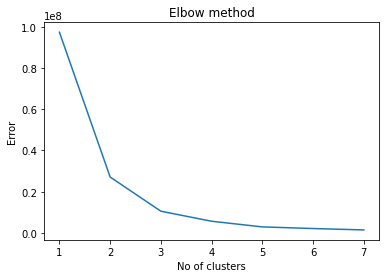

In [7]:
Error =[]
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 8), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
#plt.show()

Text(0, 0.5, 'Quantity')

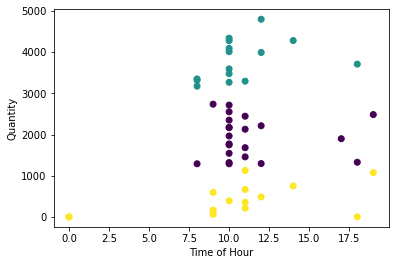

In [8]:
plt.scatter(x = c['TransactionDateTime1'], y = c['Quantity1'], c = y_kmeans) # clustered data plot
plt.xlabel('Time of Hour')
plt.ylabel('Quantity')

In [9]:
c.sort_values(['Quantity1'], ascending = False, inplace = True)
med = c['Quantity1'].median()
c

,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1,Category
0,Outlet-e,3,4798.44,12,1
25,Outlet-g,3,4338.00,10,1
40,Outlet-h,5,4280.85,14,1
41,Outlet-h,6,4277.27,10,1
49,Outlet-h,14,4092.12,10,1
43,Outlet-h,8,4010.20,10,1
5,Outlet-e,8,3992.09,12,1
34,Outlet-g,15,3709.64,18,1
24,Outlet-g,2,3593.53,10,1
35,Outlet-g,16,3477.14,10,1


In [10]:
c1 = c[c['Quantity1'] > med] 
c2 = c1.groupby([c['OutletNumber']])['OutletNumber'].count()
c2.idxmax(axis = 1)

'Outlet-h'

In [11]:
c2

OutletNumber
Outlet-e     7
Outlet-f     1
Outlet-g     8
Outlet-h    10
Name: OutletNumber, dtype: int64